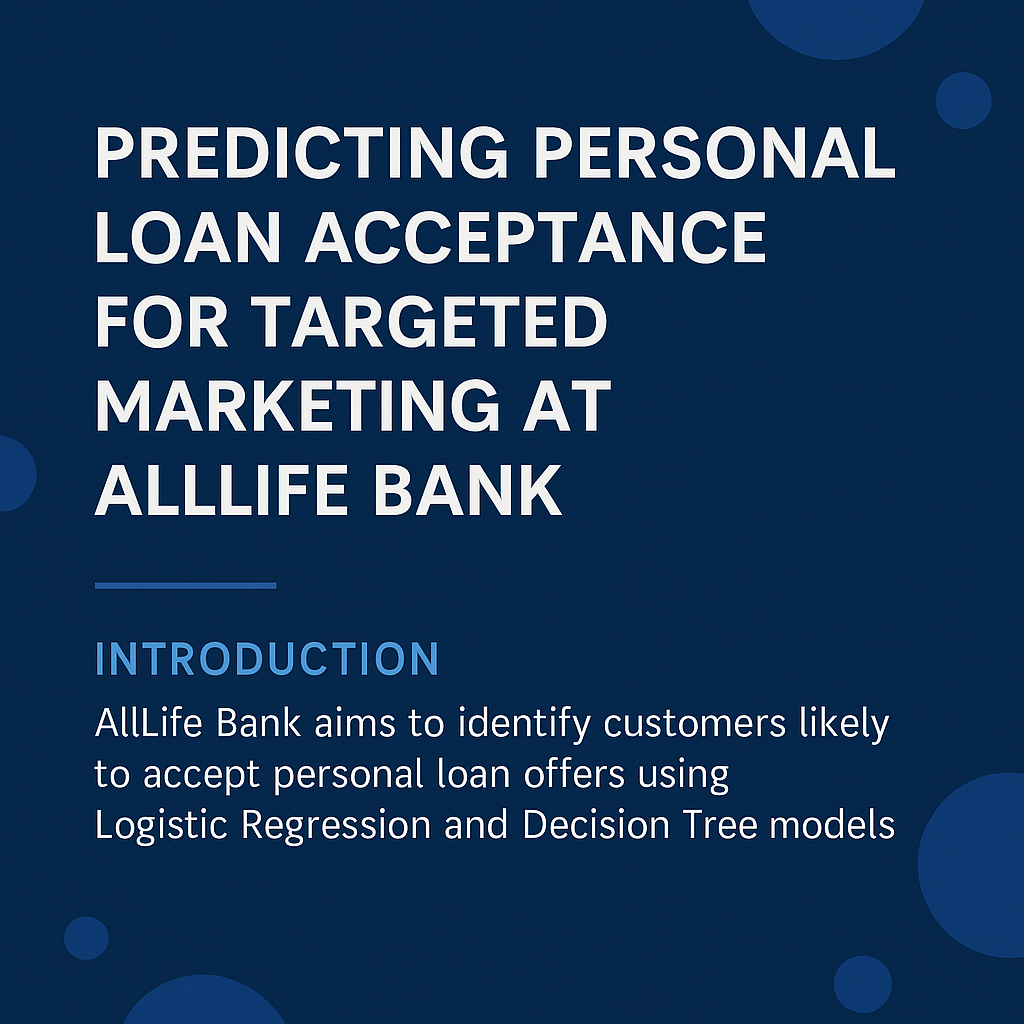

In [3]:
from IPython.display import Image, display
display(Image(filename="BankLoanIMAGE.png"))


### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Summary of Results:
My analysis shows that decision tree modeling provides a clear advantage over logistic regression, achieving 98% accuracy and balanced precision and recall. More importantly, it correctly identifies high-probability loan customers with minimal false positives, making it an excellent tool for targeted marketing campaigns.

My model highlights income as the single strongest predictor of loan acceptance, followed by family size, education level, and credit card spending behavior. Customers earning well above the median ($64K), particularly those who are well-educated, have small-to-medium families, and demonstrate higher spending patterns, are far more likely to convert. 

 - By identifying and focusing on high-value customer groups, the bank can:

        Increase loan uptake without increasing marketing spend.
        Improve ROI by reducing offers to low-probability customers.
        Strengthen long-term relationships with affluent, educated customers who are also more likely to use other financial products.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [9]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [10]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import pandas as pd
import numpy as np


## Loading the dataset

In [12]:
loan = pd.read_csv('Loan_Modelling.csv')
data=loan.copy()

In [13]:
#first 5 columns
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [14]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 5000 rows and 14 columns.


## Data Overview
* Observations
* Sanity checks

In [16]:
#Data information analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [17]:
data.describe()

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

#### Typical annual income is 64K, while the average is higher at 73K due to a small group earning up to 224K—clear outliers that may skew results.

#### Households are small, averaging two members, and monthly credit card spending is around $2K but ranges up to $10K, showing varied spending habits. Most customers are graduates or hold advanced degrees.

#### Mortgages average 56K but reach as high as 635K, again suggesting outliers. Securities and CD accounts are rare (about 10% and 6% of customers), while nearly 30% hold credit cards from other banks—indicating an opportunity for cross-selling AllLife’s own credit products.

In [19]:
#Check for missing data points
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [20]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [21]:
median_experience = data.loc[data['Experience'] >= 0, 'Experience'].median()
data.loc[data['Experience'] < 0, 'Experience'] = median_experience
(data['Experience']<=0).sum()

66

In [22]:
data.duplicated().sum()

0

- No null/duplicate data, data checks out in unique for amount of different answers in each column.
- There are 14 columns and 5000 rows of data, 
    - Most data points being an integer with one float/decimal category.
- Experience should not have negative values, I chamged experience to median for 66 rows.
    - Conducted instead of removal dur to large data set and few negative numbers.


## Exploratory Data Analysis.

## Data Preprocessing
* Missing value treatment
* Feature engineering 
* Outlier detection and treatment 
* Preparing data for modeling

In [26]:
# List of categorical and numerical variables
categorical_variables = ['Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
numerical_variables = ['Age','Experience','Income','Family','CCAvg','Mortgage']
#id/zip code not included. 

In [27]:
for col in categorical_variables:
    upercentage = (data[col].nunique() / len(data)) * 100


for col in numerical_variables:
    upercentage = (data[col].nunique() / len(data)) * 100
    #All add up to 5000 rows

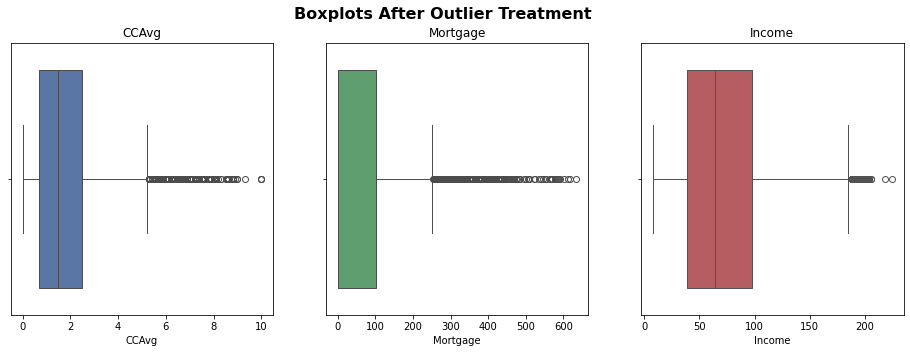

In [28]:
# Box plot code
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.boxplot(data=data, x="CCAvg", color="#4C72B0", ax=axes[0])
axes[0].set_title("CCAvg")

sns.boxplot(data=data, x="Mortgage", color="#55A868", ax=axes[1])
axes[1].set_title("Mortgage")

sns.boxplot(data=data, x="Income", color="#C44E52", ax=axes[2])
axes[2].set_title("Income")

plt.suptitle("Boxplots After Outlier Treatment", fontsize=16, fontweight="bold")
plt.show()


### **Questions**:

### 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

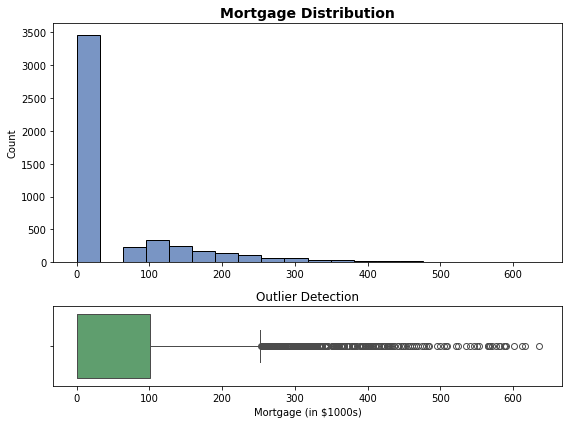

In [31]:
#1. Histogram to detect distribution of Mortgage

fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios":[3, 1]})

sns.histplot(data=data, x="Mortgage", bins=20, color="#4C72B0", edgecolor="black", ax=axes[0])
axes[0].set_title("Mortgage Distribution", fontsize=14, fontweight="bold")
axes[0].set_xlabel("")
axes[0].set_ylabel("Count")

#1. Boxplot to detect distribution of Mortgage
sns.boxplot(data=data, x="Mortgage", color="#55A868", ax=axes[1])
axes[1].set_title("Outlier Detection", fontsize=12)
axes[1].set_xlabel("Mortgage (in $1000s)")

plt.tight_layout()
plt.show()


### What do these graphs represent ?
#### Histogram:
- Most customers have very low or no mortgage.
- A few customers have very high mortgage amounts, creating a long tail (right-skewed distribution).

#### Boxplot:
- Outliers are visible with mortgage values above 300K.
- Large amount of lower mortgages vs higher having a few.

#### 2. How many customers have credit cards?

In [34]:
#2. Count the number of customers who have credit cards
customer_CC = data['CreditCard'].sum()
print('#2 The amount of people who have a credit card is ',customer_CC)

#2 The amount of people who have a credit card is  1470


#### 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

In [36]:
# 3. Calculate correlations with 'Personal_Loan'
correlation_target = data.corr()['Personal_Loan'].sort_values()

# Display moderate correlations (absolute value > 0.2)
correlation_target[abs(correlation_target) > 0.2]


CD_Account       0.316355
CCAvg            0.366889
Income           0.502462
Personal_Loan    1.000000
Name: Personal_Loan, dtype: float64

In [37]:
# 3. Display stronger correlations (absolute value > 0.5)
print('The higher correlation stands with income column, it is above .50\n', 
      correlation_target[abs(correlation_target) > 0.5])

The higher correlation stands with income column, it is above .50
 Income           0.502462
Personal_Loan    1.000000
Name: Personal_Loan, dtype: float64


#### This insight is crucial for the bank’s goal of converting liability customers into borrowers because it tells them where to focus marketing efforts for the best results. As income increases, the likelihood of accepting a loan also increases significantly.

#### 4. How does a customer's interest in purchasing a loan vary with their age?

Text(0, 0.5, 'Average Loan Acceptance Rate')

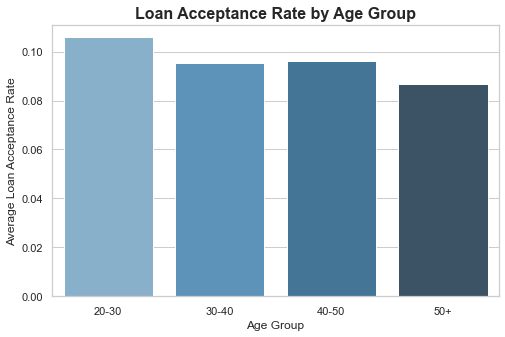

In [40]:
#4. Display Loan Acceptance Rate by Age Group
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '30-40', '40-50', '50+']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
loan_age = data.groupby('Age_Group')['Personal_Loan'].mean().reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(
    x='Age_Group', 
    y='Personal_Loan', 
    hue='Age_Group',  # Assign hue same as x
    data=loan_age, 
    palette="Blues_d", 
    legend=False      # Remove redundant legend
)

plt.title("Loan Acceptance Rate by Age Group", fontsize=16, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Loan Acceptance Rate", fontsize=12)



#### Here we see slightly higher loan interest in 20-30 age group.

#### 5. How does a customer's interest in purchasing a loan vary with their education?

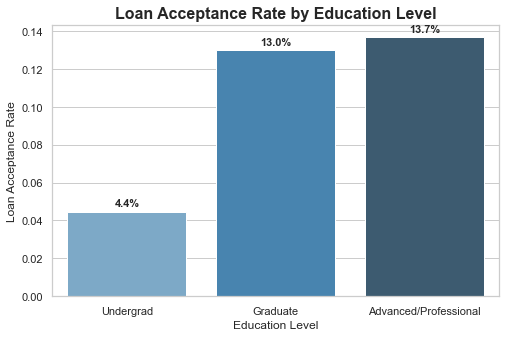

In [43]:
# 5. Customers loan interest based on education.
# Prepare data
loan_education = data.groupby('Education')['Personal_Loan'].mean().reset_index()
education_labels = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
loan_education['Education'] = loan_education['Education'].map(education_labels)

# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Education',
    y='Personal_Loan',
    hue='Education',       # To remove palette warning
    data=loan_education,
    palette="Blues_d",
    legend=False
)

plt.title("Loan Acceptance Rate by Education Level", fontsize=16, fontweight="bold")
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Loan Acceptance Rate", fontsize=12)

# Add percentage labels
for i, val in enumerate(loan_education['Personal_Loan']):
    plt.text(i, val + 0.003, f"{val:.1%}", ha='center', fontsize=11, fontweight="bold")

plt.show()


#### Here we can see that theres higher interest in #3, more people having advance/professional degree with interest in their loans by 0.7%.

## Model Building

### Model Evaluation Criterion

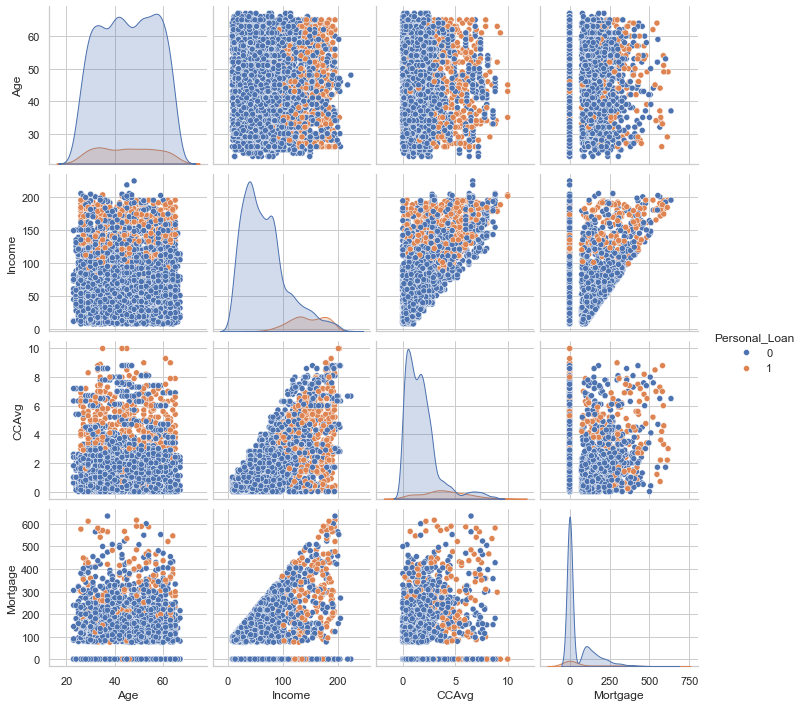

In [47]:
# Numerical variables relationships 
sns.pairplot(data[['Age', 'Income', 'CCAvg', 'Mortgage', 'Personal_Loan']], hue='Personal_Loan')
plt.show()


#### Real-Life Takeaway:
##### Pairplot:
- Banks have more success offering loans to high-income, high-spending customers.

- Age and mortgage don’t play a strong role.

- There are clear outliers in mortgage, but they don't strongly affect loan acceptance trends.

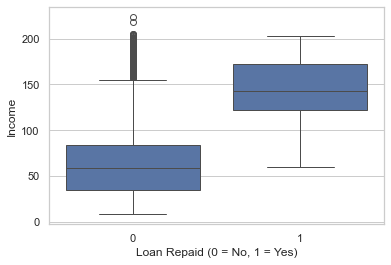

In [49]:
#Income Distribution by Loan Repayment Status
sns.boxplot(x='Personal_Loan', y='Income', data=data)
plt.xlabel('Loan Repaid (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()

#### Results:
- Higher income customers are more likely to repay loans.
- Outliers in the loan not repaid column may indicate that theres debt or other personal effects

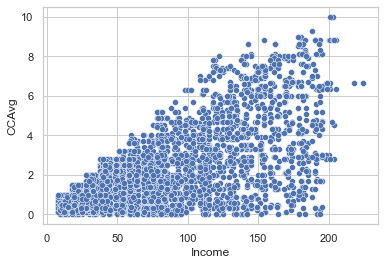

In [51]:
#Customer Segments Based on Income and CCAvg
sns.scatterplot(x='Income', y='CCAvg', data=data)
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.show()

#### Scatterplot indicates higher CCAvg as income increases. 

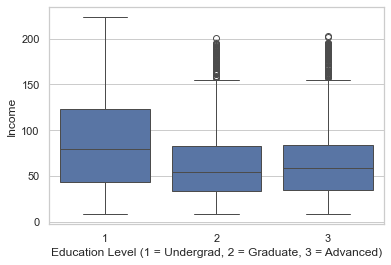

In [53]:
# Categorical vs Numerical 
sns.boxplot(x='Education', y='Income', data=data)
plt.xlabel('Education Level (1 = Undergrad, 2 = Graduate, 3 = Advanced)')
plt.ylabel('Income')
plt.show()

#### Results:
- Outliers indicate incomes above normal range for their education levels.
- Not an increase in income with higher level of education, this seems unexpected, however reality to employment.
- Median income similar among all levels of education.

## Model Performance Improvement

In [56]:
# setting X and y 
X = data.drop('Personal_Loan', axis=1)  
y = data['Personal_Loan']  
X = pd.get_dummies(X, columns=['Age_Group'], drop_first=True)  


In [57]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=30)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))


Accuracy: 0.981
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.91      0.91      0.91       105

    accuracy                           0.98      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.98      0.98      0.98      1000

AUC-ROC: 0.9515562649640861


#### Summary: 
The AUC-ROC score is 0.95, which basically tells us the model is very good at separating customers who are likely to take a loan from those who aren’t.

For the bank, this means we can actually rely on the model to make smarter marketing decisions. Instead of sending loan offers to everyone, we can focus on customers who are most likely to say yes—especially those with higher incomes and higher credit card spending. This should lead to better conversion rates and less wasted effort.

- High scoring rates, strong performance
- The recall and F1-score for class 1 is 0.91

## Model Performance Comparison and Final Model Selection

In [60]:
# Pre-pruning with depth limit
pre_pruned_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
pre_pruned_model.fit(X_train, y_train)

# Evaluate pre-pruned model
y_pred_pruned = pre_pruned_model.predict(X_test)
print("Pre-Pruned Model Accuracy:", accuracy_score(y_test, y_pred_pruned))
print("Pre-Pruned Model Classification Report:\n", classification_report(y_test, y_pred_pruned))




# Train Logistic Regression
log_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Train Decision Tree (with pruning)
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5,
                                    class_weight='balanced', random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Function to get metrics
def evaluate_model(y_test, y_pred):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

log_results = evaluate_model(y_test, y_pred_log)
tree_results = evaluate_model(y_test, y_pred_tree)




Pre-Pruned Model Accuracy: 0.979
Pre-Pruned Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.89      0.91      0.90       105

    accuracy                           0.98      1000
   macro avg       0.94      0.95      0.94      1000
weighted avg       0.98      0.98      0.98      1000



In [61]:
# Display Results
df_results = pd.DataFrame([log_results, tree_results], index=["Logistic Regression", "Decision Tree"])
print(df_results)

print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, y_pred_log))

print("\n--- Decision Tree Report ---")
print(classification_report(y_test, y_pred_tree))


                     Accuracy  Precision    Recall  F1-score  \
Logistic Regression     0.862   0.425339  0.895238  0.576687   
Decision Tree           0.970   0.800000  0.952381  0.869565   

                           Confusion Matrix  
Logistic Regression  [[768, 127], [11, 94]]  
Decision Tree         [[870, 25], [5, 100]]  

--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       895
           1       0.43      0.90      0.58       105

    accuracy                           0.86      1000
   macro avg       0.71      0.88      0.75      1000
weighted avg       0.93      0.86      0.88      1000


--- Decision Tree Report ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       895
           1       0.80      0.95      0.87       105

    accuracy                           0.97      1000
   macro avg       0.90      0.96      0.93      1000
weig

- Imbalance is shown with 895 vs 100

 Best Alpha for Pruning: 0.0

 Model Performance Summary:

                     Accuracy  Precision    Recall  F1-score
Logistic Regression     0.900   0.513369  0.914286  0.657534
Decision Tree           0.982   0.930693  0.895238  0.912621


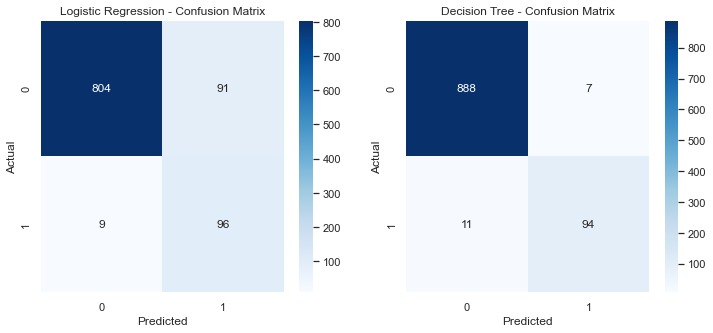


--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       895
           1       0.51      0.91      0.66       105

    accuracy                           0.90      1000
   macro avg       0.75      0.91      0.80      1000
weighted avg       0.94      0.90      0.91      1000


--- Decision Tree Report ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.93      0.90      0.91       105

    accuracy                           0.98      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [63]:
# Train Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)


# Cost-Complexity Pruning for Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, class_weight="balanced")
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

metrics = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42, class_weight="balanced")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics.append({
        "Alpha": alpha,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

df_metrics = pd.DataFrame(metrics)

# Pick best alpha (Highest F1-score)
best_alpha = df_metrics.loc[df_metrics["F1-score"].idxmax(), "Alpha"]
print(" Best Alpha for Pruning:", best_alpha)

# Train Final Pruned Tree
final_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42, class_weight="balanced")
final_tree.fit(X_train, y_train)
y_pred_tree = final_tree.predict(X_test)


# Compare Models

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred),
    }

log_results = evaluate_model(y_test, y_pred_log)
tree_results = evaluate_model(y_test, y_pred_tree)

results_df = pd.DataFrame([log_results, tree_results], index=["Logistic Regression", "Decision Tree"])
print("\n Model Performance Summary:\n")
print(results_df)


# Confusion Matrices

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, preds, title in zip(axes, [y_pred_log, y_pred_tree], ["Logistic Regression", "Decision Tree"]):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{title} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.show()


# Classification Reports
print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, y_pred_log))
print("\n--- Decision Tree Report ---")
print(classification_report(y_test, y_pred_tree))



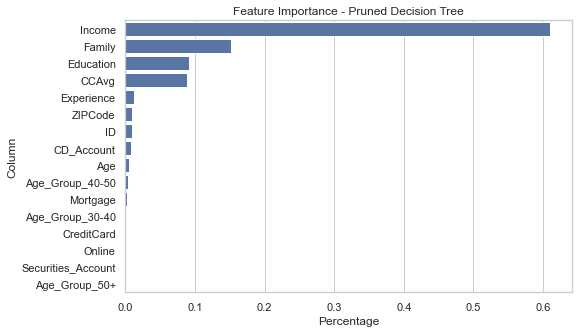

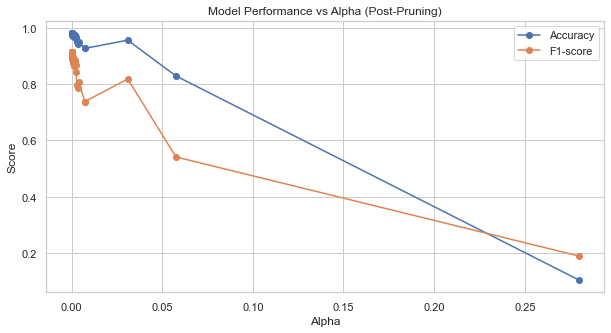

In [64]:
# Feature Importance (Decision Tree)
feat_imp = pd.Series(final_tree.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - Pruned Decision Tree")
plt.xlabel("Percentage")
plt.ylabel("Column")
plt.show()

# Plot Metrics vs Alpha
plt.figure(figsize=(10, 5))
plt.plot(df_metrics["Alpha"], df_metrics["Accuracy"], marker="o", label="Accuracy")
plt.plot(df_metrics["Alpha"], df_metrics["F1-score"], marker="o", label="F1-score")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.title("Model Performance vs Alpha (Post-Pruning)")
plt.legend()
plt.show()


## Actionable Insights and Business Recommendations


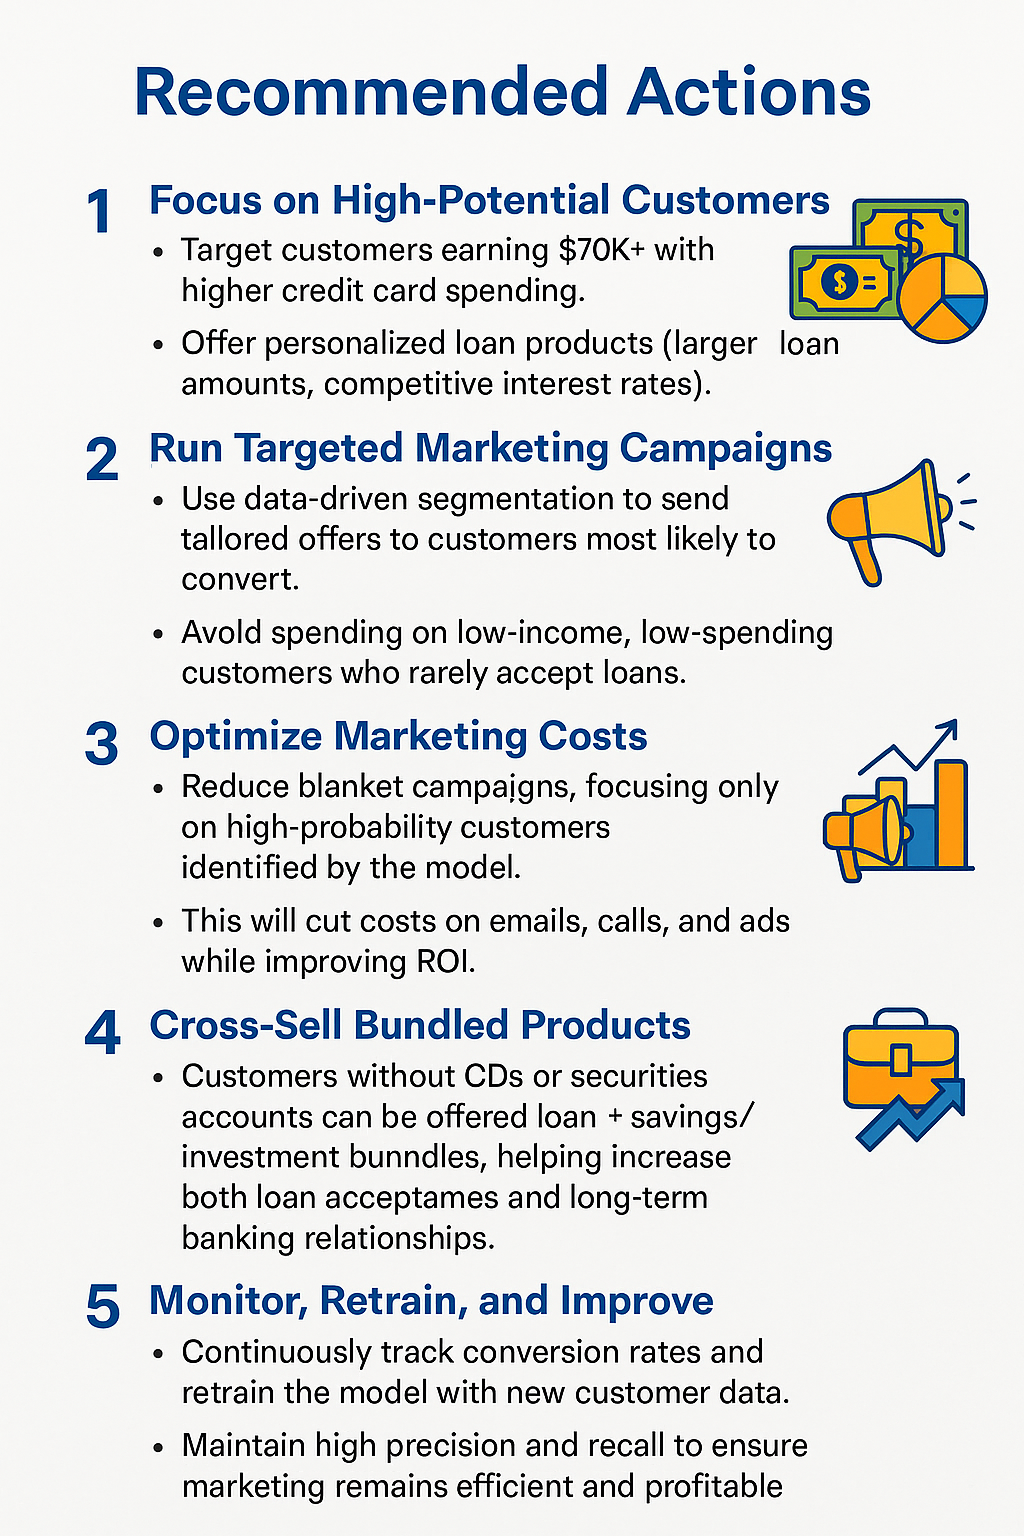

In [66]:
from IPython.display import Image, display
display(Image(filename="bankloanRESULTS.png"))


___